In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from tqdm import tqdm
import sys

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

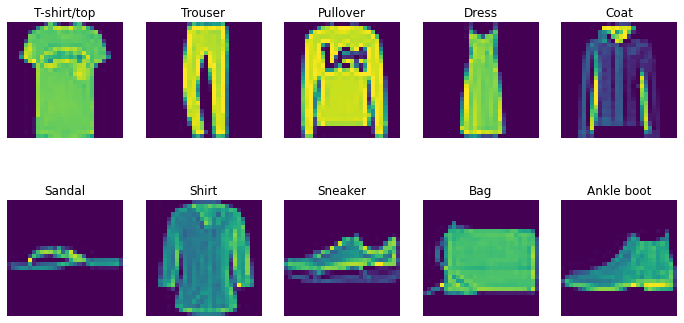

In [ ]:
# Define the class labels to print original images for
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define transformation to normalize the data
transform = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load test dataset
testset = tf.keras.datasets.fashion_mnist.load_data()[1]
testset = (testset[0].reshape(-1, 28, 28, 1), testset[1])

# Print original images for each class
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    class_indices = np.where(np.array(testset[1]) == i)[0]
    img = testset[0][class_indices[0]]
    ax.imshow(img.squeeze())
    ax.set_title(classes[i])
    ax.axis('off')
plt.show()


#Question 3A: Classification image for each digit by white noise equation. First define a function for all the noise images.Then do a loop over for all the images to average them.

Number of images for class T-shirt/top: 500
Number of images for class Trouser: 500
Number of images for class Pullover: 500
Number of images for class Dress: 500
Number of images for class Coat: 500
Number of images for class Sandal: 500
Number of images for class Shirt: 500
Number of images for class Sneaker: 500
Number of images for class Bag: 500
Number of images for class Ankle boot: 500


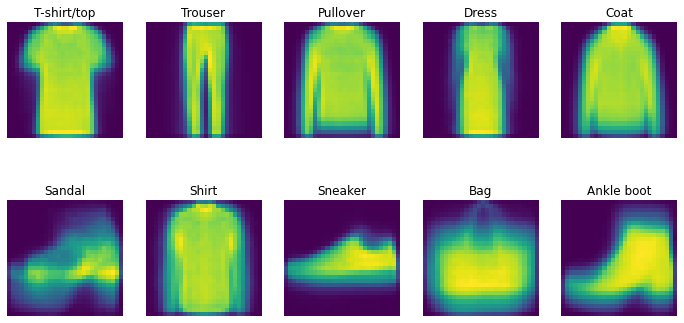

In [ ]:
# Define the gamma value
gamma = 0.2

# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define transformation to normalize the data
transform = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load test dataset
(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
testset = tf.data.Dataset.from_tensor_slices((test_images.reshape(-1, 28, 28, 1), test_labels))

def generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28, 28)):
    noise_maps = []
    class_indices = np.where(np.array(test_labels) == cls)[0]
    class_indices = class_indices[:n_samples]
    print(f"Number of images for class {classes[cls]}: {len(class_indices)}")
    for idx in class_indices:
        # Get original image
        img = test_images[idx]
        # Generate random noise
        noise = np.random.randn(*img_shape)
        # Combine noise with original image
        noisy_img = gamma * noise + (1 - gamma) * img
        noise_maps.append(noisy_img)
    return np.array(noise_maps)

# Generate noise maps for each class and average them
noise_maps=[]
avgd_noise_maps = []
for cls in range(len(classes)):
    class_noise_maps = generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28,28))
    avg_noise_map = np.mean(class_noise_maps, axis=0)
    avgd_noise_maps.append(avg_noise_map)
    noise_maps.append(class_noise_maps)

all_noise_maps = np.concatenate(noise_maps)

# Plot the noise maps
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(avgd_noise_maps[i])
    ax.set_title(classes[i])
    ax.axis('off')
plt.show()


#Train the Net and test on Fashion MNIST test dataset 

In [ ]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')



# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0



# Define the model
Net = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
Net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# Train the model
history = Net.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=callbacks)

# Load best weights
Net.load_weights('best_model.h5')


Epoch 1/20
1875/1875 [==============================] - 144s 76ms/step - loss: 0.4162 - accuracy: 0.8457 - val_loss: 0.3177 - val_accuracy: 0.8840
Epoch 2/20
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2624 - accuracy: 0.9032 - val_loss: 0.2814 - val_accuracy: 0.8917
Epoch 3/20
1875/1875 [==============================] - 138s 74ms/step - loss: 0.2175 - accuracy: 0.9191 - val_loss: 0.2504 - val_accuracy: 0.9065
Epoch 4/20
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1859 - accuracy: 0.9298 - val_loss: 0.2360 - val_accuracy: 0.9158
Epoch 5/20
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1587 - accuracy: 0.9402 - val_loss: 0.2461 - val_accuracy: 0.9120
Epoch 6/20
1875/1875 [==============================] - 132s 71ms/step - loss: 0.1373 - accuracy: 0.9479 - val_loss: 0.2507 - val_accuracy: 0.9158
Epoch 7/20
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1151 - accuracy: 0.9566 - val_loss: 0

In [ ]:
# Define the model architecture
Net = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
Net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load best weights
Net.load_weights('best_model.h5')


#3B Feed the average noise map back in to the CNN and report which class they are classified as

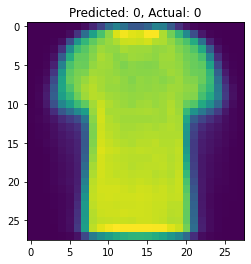

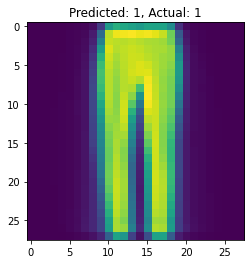

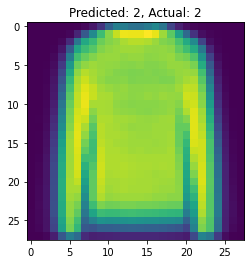

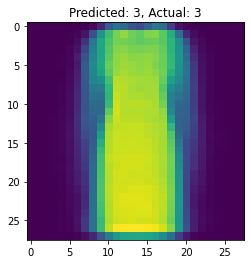

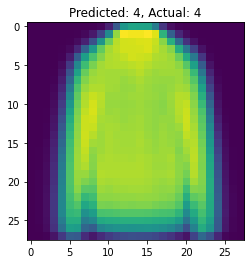

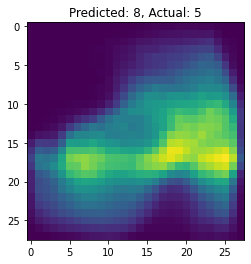

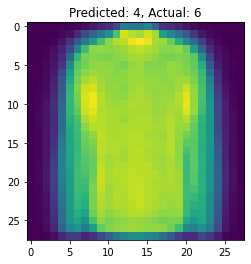

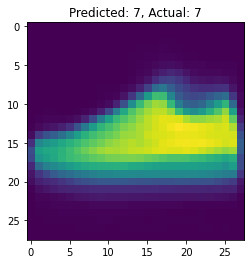

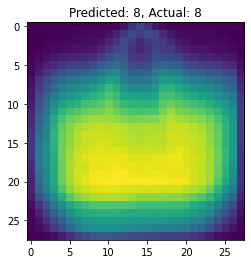

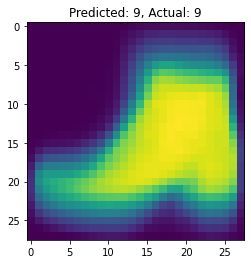

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.80        10
   macro avg       0.70      0.80      0.73        10
weighted avg       0.70      0.80      0.73        10

Accuracy: 0.8


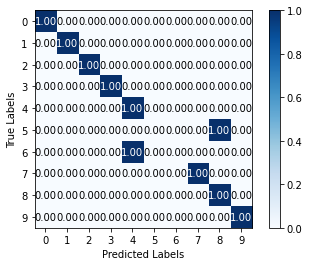

In [ ]:
# predict on averaged image
# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the digits to generate noise maps for
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define the threshold for predictions
threshold = 0.2

y_pred = []
y_true = []

for digit in digits:
    test_tensor = tf.convert_to_tensor((avgd_noise_maps[digit])[None,...], dtype=tf.float32)
    output = Net(test_tensor)
    
    # Get the predicted class and corresponding probability
    probs = tf.nn.softmax(output, axis=1)
    max_prob = tf.reduce_max(probs, axis=1)
    pred_class = tf.argmax(probs, axis=1)

   # Filter out predictions with low confidence
    if tf.greater_equal(max_prob, threshold):
        # Convert the noise map to an image
        noise_map = avgd_noise_maps[digit]
        img = (noise_map * 255)
        # Append the predicted and true labels
        y_pred.append(pred_class.numpy()[0])
        y_true.append(digit)
       
         # Display the image with the predicted and actual class labels
        plt.imshow(img)
        plt.title(f"Predicted: {classes[pred_class.numpy()[0]]}, Actual: {classes[digit]}")
        plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred)
print(report)


# Calculate the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Add labels to the plot
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()

#3C Using all the noise maps as a classifier and report the accuracy scores across all classes with confusion matrices. 

Accuracy: 0.9092184368737475


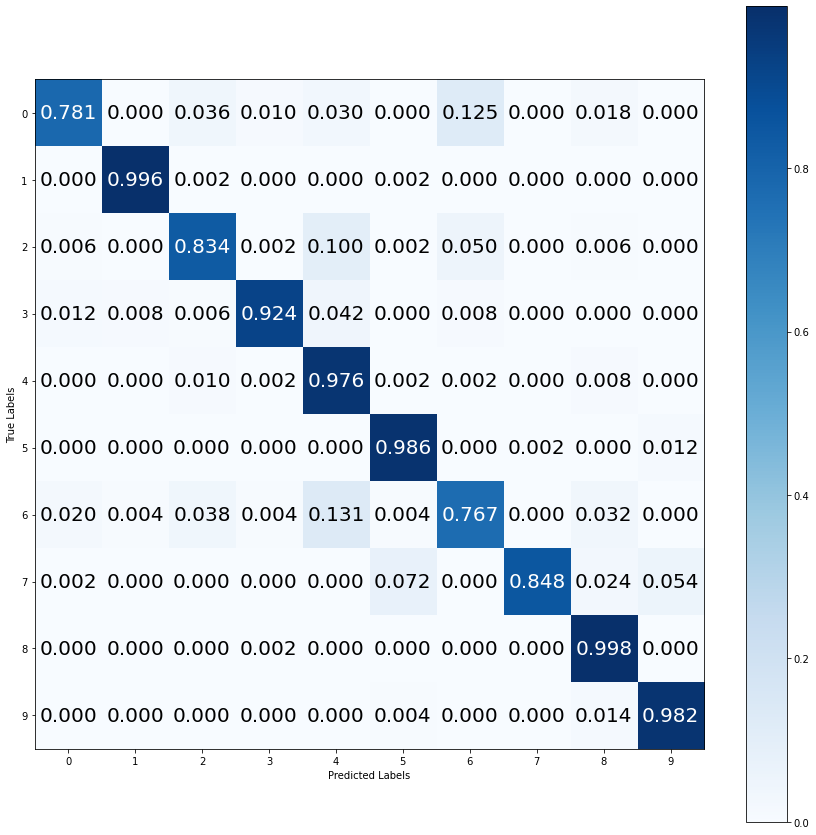

In [ ]:
# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the digits to generate noise maps for
#digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define the threshold for predictions
threshold = 0.2
# Get the predicted labels and true labels
y_pred = []
y_true = []

for i in range(all_noise_maps.shape[0]):
    test_tensor = tf.convert_to_tensor((all_noise_maps[i])[None,...], dtype=tf.float32)
    outputs = Net(test_tensor)
    #prob = torch.softmax(outputs, dim=1)
    # Get the predicted class and corresponding probability
    probs = tf.nn.softmax(outputs, axis=1)
    max_prob = tf.reduce_max(probs, axis=1)
    pred_class = tf.argmax(probs, axis=1)
    #max_prob, predicted_label = torch.max(prob.data, 1)
    if tf.greater(max_prob, tf.constant(threshold)):
       true_label = i // n_samples  # Get the true label from the digit index
       y_true.append(true_label)
       y_pred.append(pred_class.numpy()[0])

# Calculate the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Generate the confusion matrix
#num_classes = 10
#cm = np.zeros((num_classes, num_classes))
#for i in range(len(true_labels)):
 #   cm[true_labels[i], predicted_labels[i]] += 1

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Set figure size
plt.figure(figsize=(15, 15))

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Add labels to the plot
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

if cm.size > 0:
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.3f'), fontsize=20,
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")


# Show the plot
plt.show()



In [ ]:
# Generate the classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       497
           1       0.99      1.00      0.99       500
           2       0.90      0.83      0.87       500
           3       0.98      0.92      0.95       499
           4       0.76      0.98      0.86       498
           5       0.92      0.99      0.95       500
           6       0.81      0.77      0.79       497
           7       1.00      0.85      0.92       499
           8       0.91      1.00      0.95       500
           9       0.94      0.98      0.96       500

    accuracy                           0.91      4990
   macro avg       0.91      0.91      0.91      4990
weighted avg       0.91      0.91      0.91      4990



#3C  Note: Below is the confusion matrix for whole **FashionMNIST dataset** as a test data

In [ ]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Load test dataset
#(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
#testset = tf.data.Dataset.from_tensor_slices((test_images.reshape(-1, 28, 28, 1), test_labels))

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Reshape and normalize data
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

# Set the model to evaluation mode
Net.evaluate(test_images)

# Get the true labels and predicted labels for the test set
true_labels = []
predicted_labels = []

for images, labels in test_images:
    outputs = Net(images)
    predicted = tf.argmax(outputs, axis=1)
    true_labels += labels.numpy().tolist()
    predicted_labels += predicted.numpy().tolist()

# Generate the confusion matrix
num_classes = 10
cm = np.zeros((num_classes, num_classes))
for i in range(len(true_labels)):
    cm[true_labels[i], predicted_labels[i]] += 1

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Add labels to the plot
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()


# Generate the classification report
report = classification_report(true_labels, predicted_labels)
print(report)

AttributeError: ignored